Rina Parlina (2106152)
Teknik Informatika D
Pertemuan 10 Classification & Clustering

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

In [8]:
# mengimport dataset
# mdata = pd.read_csv("test.csv")
dataset = pd.read_csv('/content/test.csv')
print('Sample Data:')
dataset.head()

Sample Data:


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [9]:
# cek missing value
dataset.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [10]:
# cek tipe data
dataset.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [21]:
# menentukan label dan atribut
x = dataset.iloc[:, :-1]
y = dataset['battery_power']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)

Decision tree(Classification)

In [23]:
# melatih model
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)


DecisionTreeClassifier()

In [24]:
# nilai akurasi
print('Decision Tree Accuracy: {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decision Tree Accuracy: 0.067


[Text(0.38044655737608946, 0.9857142857142858, 'x[1] <= 529.5\ngini = 0.998\nsamples = 700\nvalue = [1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1\n1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1\n1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1\n1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2\n1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1\n1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1\n1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1\n2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1\n2, 3, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1\n1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1\n2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1\n1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1\n2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2\n2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1\n2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1\n1, 1, 1, 1, 1, 1,

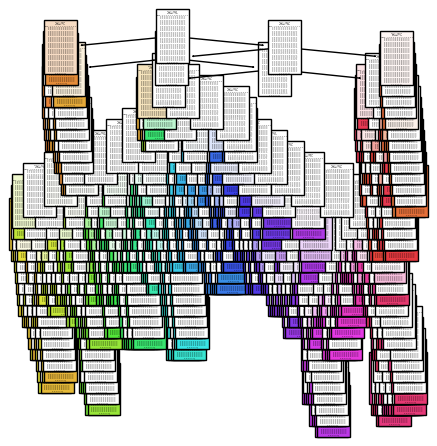

In [25]:
plt.figure(figsize=(5,5))
tree.plot_tree(dt, filled=True)

In [35]:
# melatih model
kMeans = KMeans(n_clusters=3)
labels = kMeans.fit_predict(x)
# kmeans.fit(mdata_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
db_score = davies_bouldin_score(x, labels)
print(db_score)

1.3755176244601286


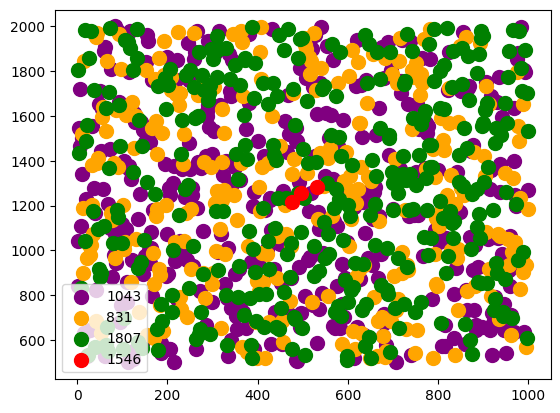

In [42]:
# visualisasi
cols = dataset.columns
plt.scatter(x.loc[labels == 0, cols[0]],
    x.loc[labels == 0, cols[1]],
    s=100, c='purple',
    label='1043')
plt.scatter(x.loc[labels == 1, cols[0]],
    x.loc[labels == 1, cols[1]],
    s=100, c='orange',
    label='831')
plt.scatter(x.loc[labels == 2, cols[0]],
    x.loc[labels == 2, cols[1]],
    s=100, c='green',
    label='1807')
plt.scatter(kMeans.cluster_centers_[:, 0],
            kMeans.cluster_centers_[:, 1],
            s=100, c='red',
            label='1546')
plt.legend()